Which proteins show significant differences between individuals with FTD due to GRN gene mutations and healthy controls?

FTD אילו חלבונים מראים הבדלים משמעותיים בין אנשים עם    
  לבין נבדקים בריאים GRN עקב מוטציות בגן  


In [ ]:
#אלה ספריות שיעזרו לי בלהריץ את הפונקציות שבחרתי 
#בסופ עשיתי pip install לכמה מהן בשביל שקוד יעבוד 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.decomposition import PCA
import numpy as np

#======1========
# התחלתי בלחלק את הקוד לפונקציות בשביל לקרוא לכל פונקציה בנפרד עם הפרמטרים שנרצה

#השתמשתי במשוואת ההפרש d 
#הפונקציות שלמטה השתמשתי בהן בשביל לחשב את ההפרש בין שתי הקבוצות בשביל לדעת אם יש הבדל משמעותי ביניהם מבחינת ביטוי החלבונים ם 
#אם יש נתון שהוא 0 אז מחזיר לי none כי אין חלוקה ב0 

def cohen_d(group1, group2):
    try:
        return (group1.mean()-group2.mean())/(np.sqrt(((len(group1)- 1) * group1.std()**2 +(len(group2)-1) * group2.std()**2)
        /(len(group1)+len(group2)-2)))
    except ZeroDivisionError:
        print("Error: Division by zero in the calc.")
        return None



#==================================================================================================================================

#=====2=======
#בפונקצייה הזו בודקים את ההפרש שיצא לנו קודם 
# השתמשתי בפונקציית אם , אם ההפרש שקיבלתי קודם היה קטן מ 0.02 ביקשתי שתחזיר לי שההפרש מאוד זניח ושאין הבדל בין הקבוצות
# עשיתי אם ההפרש יהיה בין 0.5 ו0.2 שיחזיר לי שיש הבדל בין הקבוצות אבל לא מאוד
#אם היה בין 0.5 ובין 0.8 אזלהחזיר לי שיש הבדל ביניהם 
#else - אם היה יותר מ 0.8 אז תחזיר לי שההפרש כן משמעותי 

def Check_d(valofd):
    if valofd is None:
        print ("There is no value!")
        return
    if valofd < 0.2:
        print("The effect size is very small (negligible). The difference between Con and FTD-GRN groups is insignificant.")
    elif 0.2<=valofd and  valofd<0.5:
        print("The effect size is small. There is a slight difference between Con and FTD-GRN groups.")
    elif 0.5<=valofd and valofd<0.8:
        print("The effect size is medium. There is a moderate difference between Con and FTD-GRN groups.")
    else: 
        print("The effect size is large. There is a substantial difference between Con and FTD-GRN groups.")


#================================================================================================================================

#======3=====
# בשלב הראשון , רציתי לטעון את הנתונים הנמצאים בדאתאסיט ולהתחיל לנתח אותם , בשביל זה השתמשתי בפונקציה שקוראים לה
#" loadata " 
#הפונקציה הזו עזרה לי בלהכניס את הנתונים בשביל להתחיל לעבוד איתם . 
#היא גם מבחינה בנתונים חסירים ואז מתקנת אותם . 
#יש שני סוגים של טעויות או שהוא לא מצא אותו או שיש איזשהו טעות קרתה בשביל שהקוד לא יפסיק פיתאום רק יחזיר 
#none
#זה לשורות
def Loaddata(pathOffile):
    try:
        data = pd.read_csv(pathOffile)
        print("\n#--------------(((Output 1)))--------------#")
        print("\nMissing Data:")
        print(data.isnull().sum())
        return  data.dropna()
    except FileNotFoundError:
        print(f"Error: File not found at the path you give to me.")
    except Exception as e:
        print(f"Unexpected error:{e}")
    return None

#===================================================================================================================================



#========4==========
# הפונקציה הזו לוקחת את הנתונים שנמצאים בעמודות ואז מחליפה לי את כל נתון בעמוד למספר שלם אם זה סטרינג אז משנה אותו למספר /
#מחליפים את מה שנמצא בעמוד או ל float או לint - כלומר מספר 
#ואז מדפיסה את הנתונים חסירים
# את החסירים הם הנתונים שהתחלפו ל nan 
# כאילו מה שיצא nan הוא מה שחסר 
def Clean(data, columns):
    try:
        for i in columns:
            data.loc[:, i]=pd.to_numeric(data[i],errors='coerce')
        print("\n#--------------(((Output 2)))--------------#")
        print("\nAfter Cleaning, Missing Data are:")
        print(data.isnull().sum())
        return data
    except Exception as e:
        print(f"Unexpected error:{e}")
    return None


#=====================================================================================================================================



#======5=======
#הפונקציה הראשונה בשביל לחשב את הממוצע ואת כל מה שיופיע בטבלה 
#למטה את איך הטבלה תראה
def Firstplot(data):
    try:
        SummryofTheStatistics = data.describe()
        NumberOfColms =len(SummryofTheStatistics.columns)
        fig, axes=plt.subplots(figsize=(15, 6))
        table=axes.table(cellText=SummryofTheStatistics.round(3).values,colLabels=SummryofTheStatistics.columns,
                        rowLabels=SummryofTheStatistics.index,
                        cellLoc='center',
                        loc='center')
        table.auto_set_column_width(col=list(range(NumberOfColms)))
        axes.axis('off')
        plt.title("Summary of the Statistics", fontsize=14, weight='bold', color='green')
        plt.show()
    except Exception as e:
        print(f"Unexpected error:{e}")


#========================================================================================================================================



#=======6========
#השתמשתי בפונקציה של הטי טיסט שבודקת את ה p וה t 
#ואז עשיתי פקודת אם 
#אם ה p גדול או שווה ל 0.05 אז תחזיר לי שאין הבדל סטטיסטי מובהק בין הקבוצות 
#else שהוא אם יהיה קטן מ 0.05 אז תחזיר לי שכן יש הבדל מובהק
# וגם כאן בשביל שלא יפסיק הקוד לעבוד ולקבל אירור אז ביקשתי שאם ישתבשב משהו להחזיר לי שמשהו השתבש
def ttestImplemnt(Con, FtdGrn):
    try:
        T,P = ttest_ind(Con, FtdGrn, equal_var=False)
        print("\n#--------------(((Output 3)))--------------#")
        print("\nT-test Results:")
        print(f"T-statistic: {T}")
        print(f"P-value: {P}")
        print("\n#--------------(((Output 4)))--------------#\n")
        if P>0.05 or P==0.05:
            print("P >= 0.05 So there is no statistically significant difference between Con group and FTD-GRN group.")
        else:
            print("P < 0.05 So there is a statistically significant difference between Con group and FTD-GRN group.")
        return T, P
    except ValueError as e:
        print(f"Unexpected error:{e}")
    return None, None

#======================================================================================================================================



#========7=======
#מחשב את הממוצע של שתי הקבוצות ואז מייצר גרף 
# גם מראה את הערך של המובהקות 
#וגם בו ביקשתי שיחזיר משהו במקום לקבל אירור ולהפסיק הקוד אם היה משהו לא נכון
def Secondplot(Con,FtdGrn,T, P):
    try:
        plt.figure(figsize=(8, 6))
        plt.bar(['Mean of CON', 'Mean of FTD-GRN'], [Con.mean(), FtdGrn.mean()],
                yerr=[Con.std(), FtdGrn.std()], capsize=5, color=['magenta', 'gray'])
        plt.text(0.5, max([Con.mean(), FtdGrn.mean()])+1, f"T-statistic: {T:.2f}\nP-value: {P:.3f}",
                fontsize=12, color='black', ha='center',bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))
        plt.title('Comparison of Means with Statistical Results', fontsize=14, weight='bold')
        plt.ylabel('Mean Value')
        plt.grid(axis='y')
        plt.show()
    except ValueError as e:
        print(f"Unexpected error:{e}")


#======================================================================================================================================



#========8=======
#נותן לי החלבונים ה 20 שיש להם  הבדל בביטוי 
# הפונקצייה הזו ממינת את הערכים ונותנת את הכי גדולים
# head 20 כדי שיתן לי ה20 הכי גדולים
#השאר בשביל המראה של הגרף 
# גם בו בשביל לא לעצור את הכל ביקשתי שאם תהיה בעיה בהרצת הקוד שיכתוב שמשהו השתבש 
def Thirdplot(data):
    try:
        Sorting=data.sort_values(by='Log2 FC (FTD-GRN/CON)', ascending=False).head(20)
        sns.barplot(x='Log2 FC (FTD-GRN/CON)', y='Gene name', data=Sorting, palette='viridis', hue='Gene name')
        plt.title('Top 20 Proteins by Log2 Fold Change')
        plt.xlabel('Log2 Fold Change (FTD-GRN/CON)')
        plt.ylabel('Gene Name')
        plt.show()
    except ValueError as e:
        print(f"Unexpected error:{e}")


#======================================================================================================================================



#=======9=======
#- נתנתי לפונקציה את הנתונים האלה 
# השתמשתי בפונקציה הזו שעובדת דרך מטריצה מסוימת בשביל ליצור heatmap שיש בה את הקורילציה בין כל שני כותרות של הנתונים שאני בחרתי 
# וגם בו ב except ביקשתי שיחזיר לי שיש משהו לא בסדר
def Forthplot(data):
    try:
        Heatmapp=data[['Mean of CON', 'Mean of FTD-GRN', 'Difference', 'Log2 FC (FTD-GRN/CON)']]
        Matrix=Heatmapp.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(Matrix, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title('Correlation Heatmap')
        plt.show()
    except ValueError as e:
        print(f"Unexpected error:{e}")

#=======================================================================================================================================



#=======10========
#הפונקציה הזו עושה היסטוגרמה 
# נתנתי לה את הדאטא שאני רוצה להשתמש בה ואז את המאפיינים של הגרף
def Fifthplot(data):
    try:
        plt.figure(figsize=(12, 6))
        sns.histplot(data['Log2 FC (FTD-GRN/CON)'], color='crimson')
        plt.title('Distribution of Log2 Fold Change (FTD-GRN/CON)')
        plt.xlabel('Log2 Fold Change (FTD-GRN/CON)')
        plt.ylabel('Frequency')
        plt.show()
    except ValueError as e:
        print(f"Unexpected error:{e}")


#=======================================================================================================================================



#============11==========
# הפונקציה הזו נותנת גרף של נקודות מפוזרות , קראתי לה גם שישית וגם שביעית אבל בקוד ההרצה קראתי לכל אחת לבד 
# בחרתי איזה מהן לעבוד דרך שינוי שם הקבוצה 
# בהתחלה קראתי לבריאים ואז לחולים
def SixthSeventhplots(data,x,y,color, title):
    try:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x=x, y=y, data=data, color=color)
        plt.title(title)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()
    except ValueError as e:
        print(f"Unexpected error:{e}")

#==========================================================================================================================================





 :)
עכשין אתחיל לקרוא לכל אחד בנפרד 
מוכנים לקסם ? 

In [32]:
data=Loaddata('/Users/jasminrian/Downloads/AllFTD_T_Test.csv')


#--------------(((Output 1)))--------------#

Missing Data:
Gene name                3
Discovery?               0
P value                  0
Mean of CON              0
Mean of FTD-GRN          0
Difference               0
SE of difference         0
t ratio                  0
df                       0
q value                  0
Log2 FC (FTD-GRN/CON)    0
 - log10 p value         0
dtype: int64


יצא לנו שחסרים שלושה ערכים בשורה של השם של הגנים 

In [31]:
NumberColums= ['P value', 'Mean of CON', 'Mean of FTD-GRN', 'Difference',
                       'SE of difference', 't ratio', 'df', 'q value',
                       'Log2 FC (FTD-GRN/CON)', ' - log10 p value ']
Cleann=Clean(data, NumberColums)


#--------------(((Output 2)))--------------#

After Cleaning, Missing Data are:
Gene name                 0
Discovery?                0
P value                   0
Mean of CON               0
Mean of FTD-GRN           0
Difference                0
SE of difference          0
t ratio                   0
df                        0
q value                  61
Log2 FC (FTD-GRN/CON)     0
 - log10 p value          0
dtype: int64


יצא לנו שחסרים 62 ערכים בעמודה של ה q value

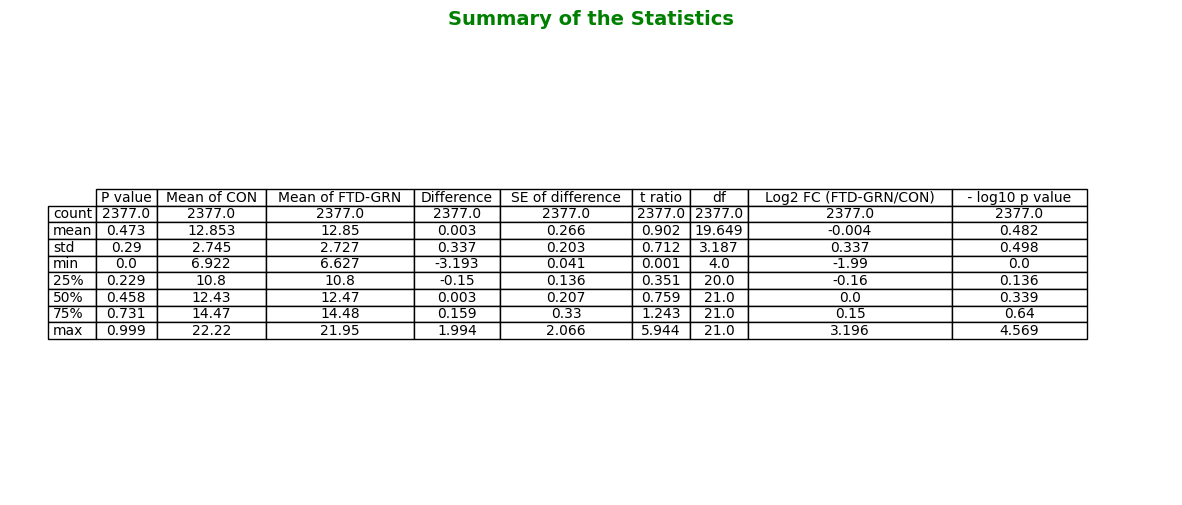

In [21]:
Firstplot(Cleann)


Details of the Table:

Count: All columns have 2377 values, indicating that the dataset is complete after cleaning, except for previously noted missing data in q value.

The table presents descriptive statistics for the dataset after cleaning and preparing it for analysis. It provides insights into key columns that are important for understanding the differences between the CON (control group) and FTD-GRN (patients group) groups.

Mean of CON and Mean of FTD-GRN:

Mean: CON: 12.853, FTD-GRN: 12.85

The averages are nearly identical, with a difference of only 0.003.

Standard deviation (std):Both groups show similar variability (~2.7), indicating that the distribution of protein expression is consistent across groups.

Min and Max: CON: Range from 6.92 to 22.22, FTD-GRN: Range from 6.63 to 21.95. 

Difference: Represents the difference between Mean of CON and Mean of FTD-GRN. 

Mean: 0.003, indicating no significant overall difference.

Std: 0.337, showing relatively small variability in the differences.

Range: From -3.193 to 1.994, meaning some proteins have larger differences.

Log2 FC (FTD-GRN/CON): Measures the relative change between groups on a log2 scale.

Mean: -0.004, indicating no overall relative change.

Range: From -1.99 to 3.196, showing that some proteins have substantial changes.

P value: Mean: 0.473, with a range from 0 to 0.999.

Indicates no significant difference for most proteins, as many P-values are likely 
above the 0.05 threshold.

-log10 p value: Highlights proteins with very small P-values (high significance).

Maximum: 4.569 corresponds to a highly significant result.

Other Statistical Columns (SE of difference, t ratio, df):
Provide additional context for the statistical tests (standard error, T-statistic, and degrees of freedom). Variability across these metrics is small, reflecting the uniformity of the dataset.


#--------------(((Output 3)))--------------#

T-test Results:
T-statistic: 0.044487713280218444
P-value: 0.9645175149650891

#--------------(((Output 4)))--------------#

P >= 0.05 So there is no statistically significant difference between Con group and FTD-GRN group.


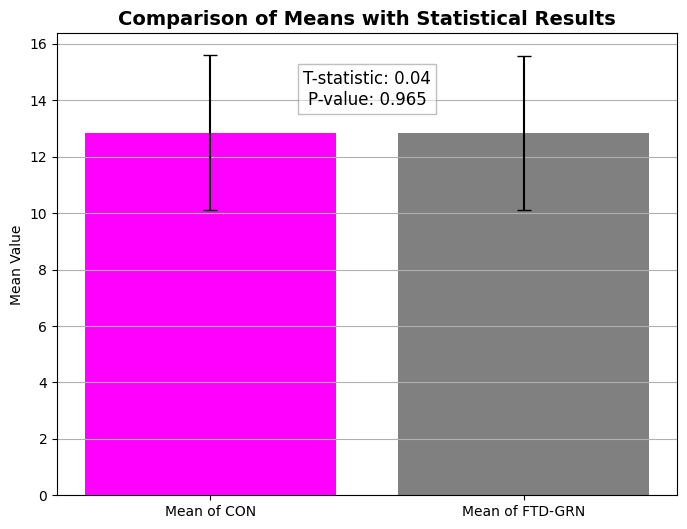

In [33]:
Con =Cleann['Mean of CON'] 
FtdGrn=Cleann['Mean of FTD-GRN'] 
T,P=ttestImplemnt(Con, FtdGrn)
Secondplot(Con, FtdGrn, T, P)

T-statistic: 0.04449
בגלל שהערך שיצא קרוב מאוד ל 0 , אז ההבדל בין שתי הקבוצות הוא הבדל מינימלי 
 P-value: 0.965
הערך שיצא גבוהה מ 0.05 ולכן אין הבדל מובהק סטטיסטית בין שתי הקבוצות 
ורואים בגרף שאין הבדל מובהק סטטיסטית בהבעה החלבון הממוצעת הכללית בין שתי הקבוצות
וההבדלים זניחים ואינם בעלי משמעות ביולוגית

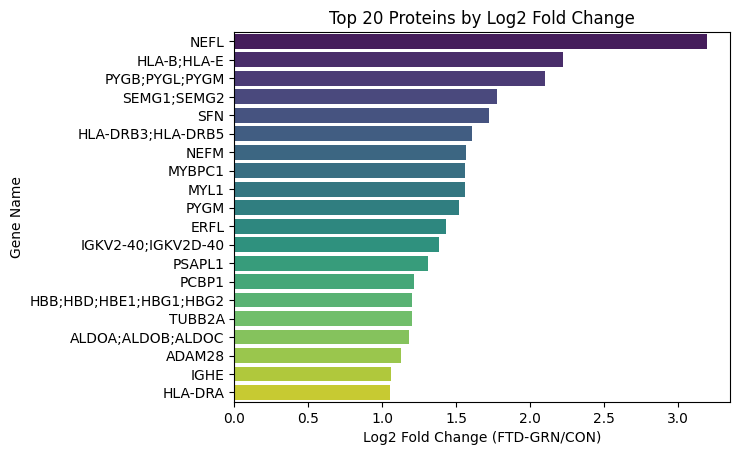

In [34]:
Thirdplot(Cleann)

אז מה יכולים להבין מהגרף שנוצר ? 
NEFL
החלבון הזה מציג את השינוי הגבוה ביותר בביטוי, מה שמעיד על כך שהוא עשוי להיות חלבון מרכזי במחלה. זה עשוי להוות יעד למחקר נוסף
HLA-B, HLA-E, PYGB, PYGL, PYGM
גם החלבונים האלה מציגים שינויים גבוהים בביטוי וזה גם מעיד על מעורבותם הפוטנציאלית במצב
SPRR2G / IGHE
מציגים שינויים קטנים יותר בביטוי, אך גם הם יכולים להיות קשורים למחלה.


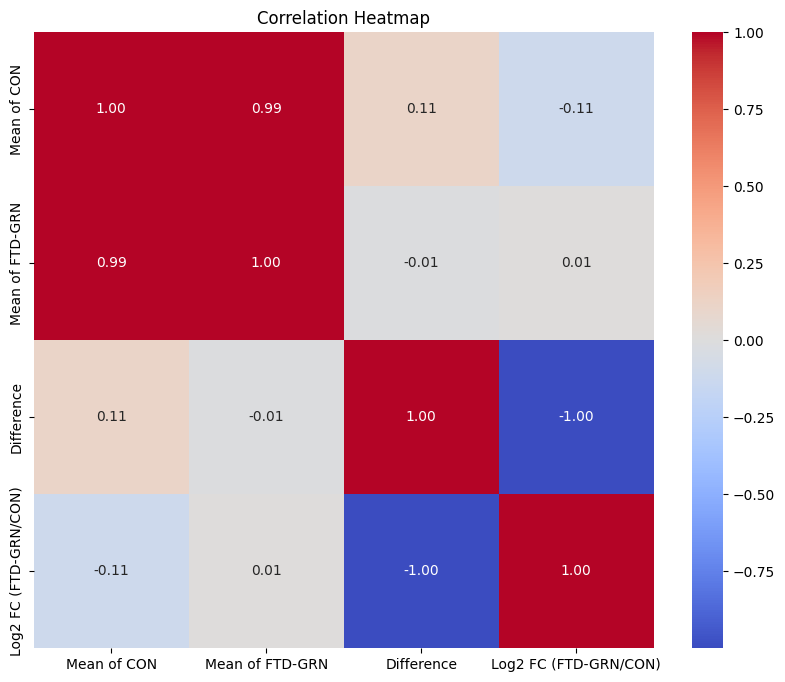

In [35]:
Forthplot(Cleann)

אדום (1.00): קורלציה חיובית חזקה
כחול (-1.00): קורלציה שלילית חזקה
הצבעים הבהירים מאוד (0.00): אין קורלציה

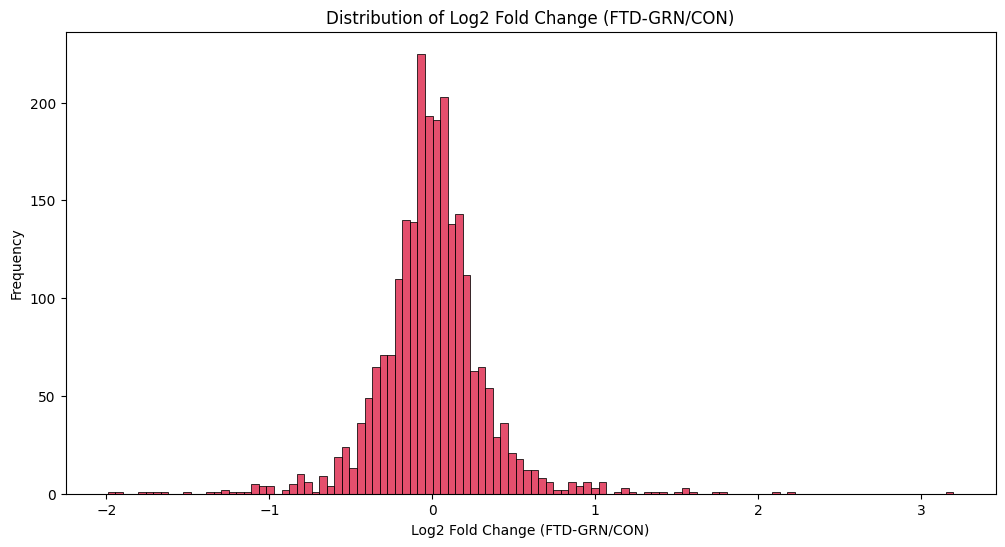

In [36]:
Fifthplot(Cleann)

יצרתי גרף היסטוגרמה שמתארת את התפלגות השינוי בהבעה של חלבונים בין שני קבוצות: קבוצת ה-FTD-GRN (חולים) וקבוצת ה-CON (קבוצת ביקורת)
הגרף כולל את הציר האופקי (X)
 שמייצג את שינוי ההבעה של החלבונים במונחים של 
 Log2 Fold Change
  (שינוי ביחס בין הקבוצות)
. אם הערך חיובי, המשמעות היא שהחלבון נמצא בהבעה גבוהה יותר בקבוצת ה-FTD-GRN
   ואם הערך שלילי, החלבון נמצא בהבעה גבוהה יותר בקבוצת ה
   CON
הציר האנכי (Y) 
מייצג את תדירות (Frequency) 
החלבונים שנמצאים בטווחים שונים של שינוי בהבעה (Log2 Fold Change)


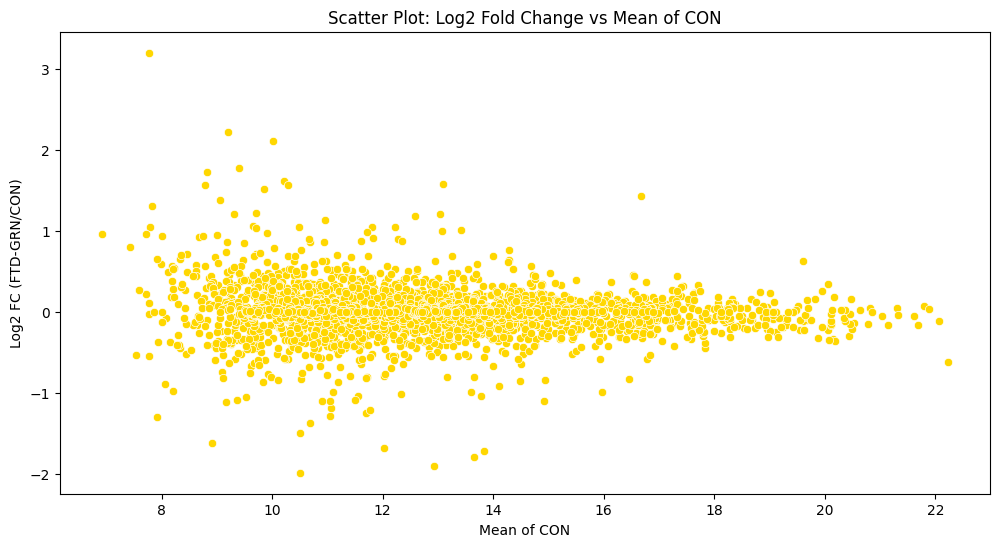

In [37]:
SixthSeventhplots(Cleann, 'Mean of CON', 'Log2 FC (FTD-GRN/CON)', 'gold', 'Scatter Plot: Log2 Fold Change vs Mean of CON')


ציר ה-X:
 מציין את הממוצע של ביטוי החלבון בקבוצת הביקורת 
 (CON). הכוונה היא לערך הממוצע של ביטוי החלבונים בקבוצה הזו.

ציר ה-Y:
 מציין את ה-Log2 Fold Change,
  שהוא יחס הלוגרטם של השינוי בביטוי החלבון בין קבוצת ה-FTD-GRN לבין קבוצת הביקורת. 
  לעומת קבוצת הביקורת

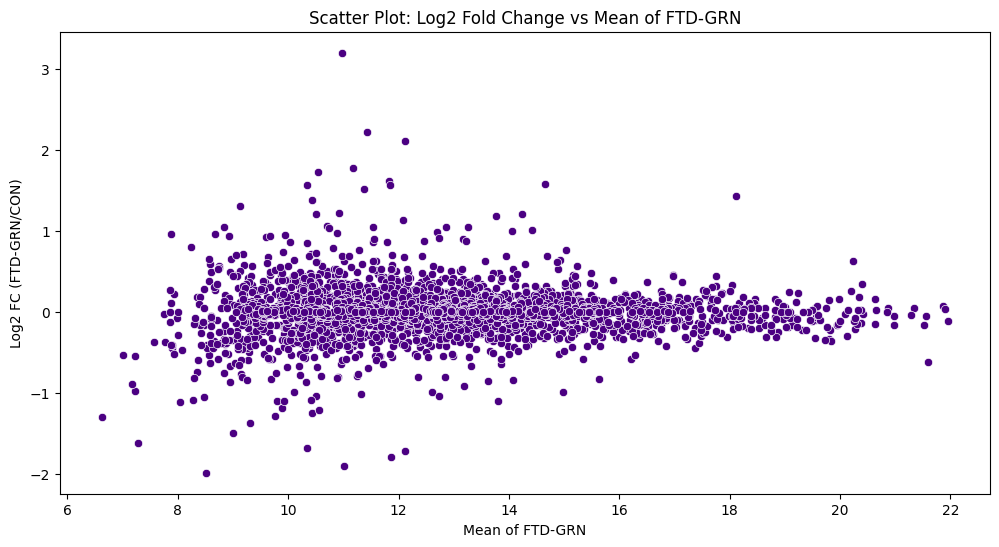

In [38]:
SixthSeventhplots(Cleann, 'Mean of FTD-GRN', 'Log2 FC (FTD-GRN/CON)', 'indigo', 'Scatter Plot: Log2 Fold Change vs Mean of FTD-GRN')

ציר ה-X:
 מציין את הממוצע של ביטוי החלבון בקבוצת הביקורת 
 (FTD-GRN). הכוונה היא לערך הממוצע של ביטוי החלבונים בקבוצה הזו.

ציר ה-Y:
 מציין את ה-Log2 Fold Change,
  שהוא יחס הלוגרטם של השינוי בביטוי החלבון בין קבוצת ה-FTD-GRN לבין קבוצת הביקורת. 
  לעומת קבוצת הביקורת

In [39]:
dCohen=cohen_d(Con, FtdGrn);
print("\n#--------------(((Output 5)))--------------#") 
print(f"\nd of Cohen: {dCohen}")
Check_d(dCohen) 
print("\n#------------------------------------------#")


#--------------(((Output 5)))--------------#

d of Cohen: 0.0012904479440979106
The effect size is very small (negligible). The difference between Con and FTD-GRN groups is insignificant.

#------------------------------------------#


מסקנות :

אין הבדל משמועתי ברמות הביטוי הכלליות של חלבונים בין הקבוצות , רואים את זה לפי התוצאות של מבחן t שיצא שאין הבדל סטטיסטי מובהק בין שתי הקבוצות 

למרות שהממוצע הכללי דומה , ישנם חלבונים מסוימים עם הבדלים גדולים ברמות הביטוי שלהם בין הקבוצות לפי 
חלבונים כגון NEFL, HLA-B, HLA-E, PYGB, PYGL, PYGM הראו את השינויים הגדולים ביותר בביטוי.



אלה למטה ספריות שהתקנתי בשביל שהקוד יצליח לרוץ

In [1]:
pip install numpy matplotlib pandas


[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
pip install scipy

  Using cached scipy-1.15.1-cp313-cp313-macosx_10_13_x86_64.whl.metadata (61 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 1.1 MB/s eta 0:00:0000:0100:020m

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 793.3 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
